# RF/DN Multiclass Comparisons on CIFAR10

In [9]:
# Import necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define color palette
sns.set(color_codes=True, style="white", context="talk", font_scale=1.5)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[1:5] + PALETTE[6:], n_colors=9)

In [4]:
def load_result(filename):
    """
    Loads results from specified file
    """
    input = open(filename, "r")
    lines = input.readlines()
    ls = []
    for line in lines:
        ls.append(float(line.strip()))
    return ls


def produce_mean(ls):
    """
    Produces means from list of 8 results
    """
    ls_space = []
    for i in range(int(len(ls) / 8)):
        l = ls[i * 8 : (i + 1) * 8]
        ls_space.append(l)

    return np.mean(ls_space, axis=0)

In [43]:
# Load 3-classes accuracies
acc_3 = [
    load_result("3_class/naive_rf.txt"),
    load_result("3_class/cnn32.txt"),
    load_result("3_class/cnn32_2l.txt"),
    load_result("3_class/cnn32_5l.txt"),
    load_result("3_class/resnet18.txt"),
]

# Load 8-classes results
acc_8 = [
    load_result("8_class/naive_rf.txt"),
    load_result("8_class/cnn32.txt"),
    load_result("8_class/cnn32_2l.txt"),
    load_result("8_class/cnn32_5l.txt"),
    load_result("8_class/resnet18.txt"),
]

accs = [acc_3, acc_8]

In [44]:
def plot_acc(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][3][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dotted",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][4][k * 8 : (k + 1) * 8],
            color="#4daf4a",
            alpha=0.1,
        )

    # Plot mean results
    col.plot(
        samples_space,
        produce_mean(accs[pos][0]),
        linewidth=5,
        color="#e41a1c",
        label="RF",
    )
    col.plot(
        samples_space,
        produce_mean(accs[pos][1]),
        linewidth=5,
        color="#377eb8",
        label="CNN32",
    )
    col.plot(
        samples_space,
        produce_mean(accs[pos][2]),
        linewidth=5,
        color="#377eb8",
        linestyle="dashed",
        label="CNN32_2l",
    )
    col.plot(
        samples_space,
        produce_mean(accs[pos][3]),
        linewidth=5,
        color="#377eb8",
        linestyle="dotted",
        label="CNN32_5l",
    )
    col.plot(
        samples_space,
        produce_mean(accs[pos][4]),
        linewidth=5,
        color="#4daf4a",
        label="Resnet18",
    )

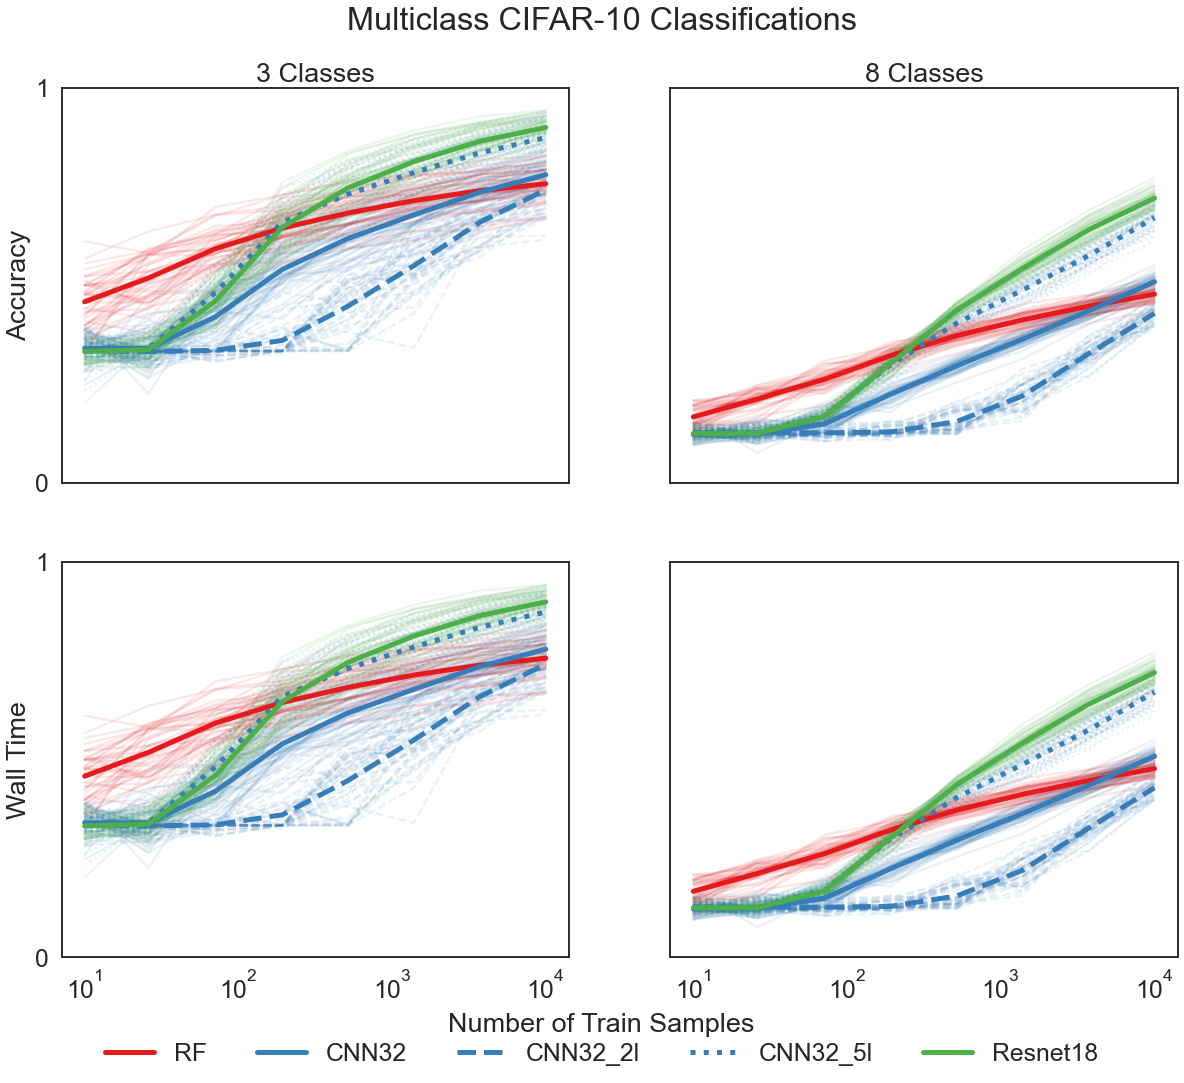

In [53]:
# Create a figure with 2x2 subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
plt.suptitle("Multiclass CIFAR-10 Classifications", y=0.93, va="baseline")
fig.text(0.5, 0.06, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 10000, num=8, dtype=int)
xtitles = ["3 Classes", "8 Classes"]
ytitles = ["Accuracy", "Wall Time"]
ylimits = [[0,1],[0,1]]

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        count = 2 * i + j
        col.set_xscale("log")
        col.set_ylim(0, 1)

        # Label y axis
        if count % 2 == 0:
            col.set_yticks(ylimits[i])
            col.set_ylabel(ytitles[i])
        else:
            col.set_yticks([])

        # Label x axis and plot figures
        if count < 2:
            col.set_xticks([])
            col.set_title(xtitles[j])
            plot_acc(col, accs, j)
        else:
            col.set_xticks([1e1, 1e2, 1e3, 1e4])
            plot_acc(col, accs, j)

leg = plt.legend(
    bbox_to_anchor=(0.5, 0.07),
    bbox_transform=plt.gcf().transFigure,
    ncol=5,
    loc="upper center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)